In [235]:
import numpy as np
import pandas as pd
import sortedcontainers as SortedList
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle

In [242]:
count=0

label_map=['0','1','2','3','4','5','6','7','8','9']
img_matrix=[]
expr=[]
img_norm_global=[]
img_vec_=[]

for line in open('train.csv'):     #file consist of 35887 entry, but 35875 not zero max of pixel non zero each entry has 1 digit for emotion then and array of 2304 pixel intensity (48*48) and 1 text for name (traning/test) not necessary here
    count=count+1
    #print(count)

        
    list_=line.replace('\n',' ').replace(',',' ').strip().split(' ')
    #print(list_)
    if (count<5):
        
        #print(len(list_))
        #print(list_)
        pass
    #txt=list_[len(list_)-1]
    if(count>1):
        image_vec=np.array((list_[1:len(list_)]))   #list string
        image_vec_i=[int(i) for i in image_vec]   # list to integer
    
        if(len(list_)==785 and np.max(image_vec_i)!=0 and count>1):     #28*28+1
            
            expr_=int(list_[0])
            expr.append(expr_)
        
            image_vec_i=np.array(image_vec_i)
            img_vec_.append(image_vec_i)
            image_vec_i_norm=np.array(image_vec_i)/255.0                              #np.max(image_vec_i)
            img_matrix.append(image_vec_i_norm)             #for solving
            len_N=int(np.sqrt(np.shape(image_vec_i)[0]))
            img=image_vec_i.reshape(len_N,len_N)
            img_norm=img/255.0                              #(np.max(img))
            #print(np.max(img))
            img_norm_global.append(img_norm)     #for plotting figs
        
        


['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90',

In [243]:
np.shape(img_matrix)

(42000, 784)

In [248]:

N=np.shape(img_matrix)[0]
D=np.shape(img_matrix)[1]

YY=np.random.randn(N)
XX=np.zeros((N,D))

limit_=N                       #incase don't want all 42000 samples, change it to other number than N
        
for i in range(limit_):
    YY[i]=expr[i]    #expressions
    for j in range(D):
                
        XX[i,j]=img_matrix[i][j]     #pixels into XX
 
       


In [246]:
XX[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [260]:
Xtrain=XX[0:1000,:]
Ytrain=YY[0:1000]

Xtest=XX[1000:1300,:]
Ytest=YY[1000:1300]

Y_pred=np.zeros(300)
#print(Y_pred)

dist_list=[]
j_list=[]
i_list=[]
y_list=[]
K_list=[]
count_list=[]
accuracy_vec=[]
accuracy_vec2=[]

Xnotbase=Xtest          #Xtrain
Ynotbase=Ytest         #Ytrain

K=50
#K_K=[50]  K_K

for i_k in range(K):   
    print('i_k',i_k)

    for i,x in enumerate(Xnotbase):   #pick a point loop over all domain for distances
        #print('i',i)
        #print(i,j)
        for j,xt in enumerate(Xtrain):
            dis=np.dot((x-xt),(x-xt))
            dist_list.append(dis)
            #j_list.append(j)
            #i_list.append(i)
            y_list.append(Ytrain[j])
            #print(i,j,dis,Ytrain[j])
        #print('\n')   
        #zipped=zip(i_list,j_list,dist_list,y_list)   
        zipped=zip(dist_list,y_list)  
        #print('*********')

        zipped_sorted=sorted(zipped, key=lambda xx: xx[0])
        #print('\n')
        #print(zipped_sorted)
        #print('\n')
        #print('----------')
        for ii in range(i_k+1):
            #if (ii==K):
            #print(i,ii,zipped_sorted[ii],zipped_sorted[ii][1])
            K_list.append(int(zipped_sorted[ii][1]))
        #print(K_list)
        #print('%%%%%%%%%%%%%%%%%%')
        #print(K,i,j_list[K],zipped_sorted[K])
        max_count=0
        #for iii in range(10):
        for iii in K_list:
            #print(iii,K_list.count(iii))
            if(K_list.count(iii)>max_count):      #this way if there is multiple with same count, you get the first occurance 
                max_count=K_list.count(iii)
                max_int=iii
        #print('++')
        #print(max_int,max_count) 
        Y_pred[i]=max_int
        dist_list=[]
        j_list=[]   
        i_list=[]
        y_list=[]
        K_list=[]
        count_list=[]
        #print('----------')
        #print('----------')
        #print('\n')
    #print(Y_pred)
    accuracy=np.mean(Y_pred==Ynotbase) 
    accuracy_vec2.append(accuracy)
    Y_pred=np.zeros(300)
    #print(accuracy)
    

i_k 0
i_k 1
i_k 2
i_k 3
i_k 4
i_k 5
i_k 6
i_k 7
i_k 8
i_k 9
i_k 10
i_k 11
i_k 12
i_k 13
i_k 14
i_k 15
i_k 16
i_k 17
i_k 18
i_k 19
i_k 20
i_k 21
i_k 22
i_k 23
i_k 24
i_k 25
i_k 26
i_k 27
i_k 28
i_k 29
i_k 30
i_k 31
i_k 32
i_k 33
i_k 34
i_k 35
i_k 36
i_k 37
i_k 38
i_k 39
i_k 40
i_k 41
i_k 42
i_k 43
i_k 44
i_k 45
i_k 46
i_k 47
i_k 48
i_k 49


In [241]:
Xnotbase

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [261]:
accuracy_test=accuracy_vec2
#print(accuracy_train,accuracy_test)
accuracy_test

[0.8733333333333333,
 0.8733333333333333,
 0.8666666666666667,
 0.8866666666666667,
 0.8733333333333333,
 0.8766666666666667,
 0.8566666666666667,
 0.8633333333333333,
 0.86,
 0.8566666666666667,
 0.8566666666666667,
 0.8633333333333333,
 0.8466666666666667,
 0.8433333333333334,
 0.8466666666666667,
 0.8466666666666667,
 0.8266666666666667,
 0.83,
 0.8233333333333334,
 0.82,
 0.8166666666666667,
 0.8,
 0.8066666666666666,
 0.7966666666666666,
 0.79,
 0.7933333333333333,
 0.7933333333333333,
 0.8,
 0.7933333333333333,
 0.7966666666666666,
 0.7866666666666666,
 0.7833333333333333,
 0.78,
 0.78,
 0.7666666666666667,
 0.7633333333333333,
 0.7633333333333333,
 0.77,
 0.7633333333333333,
 0.7633333333333333,
 0.76,
 0.7633333333333333,
 0.77,
 0.7566666666666667,
 0.7466666666666667,
 0.7466666666666667,
 0.7533333333333333,
 0.75,
 0.74,
 0.7333333333333333]

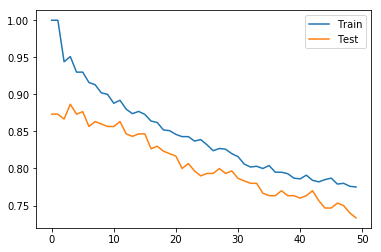

In [262]:
plt.plot(np.array(range(K)),accuracy_train,label='Train')
plt.plot(np.array(range(K)),accuracy_test,label='Test')
plt.legend()

In [75]:
zipped_sorted[0:3]

[(9, 0.0, 3.0), (5, 84.99800076893503, 0.0), (2, 98.77390234525183, 1.0)]

In [24]:
np.shape(XX)

(42000, 784)

[22452 27241 41622 28393  1470 21108 34314 11281 23881 31831]


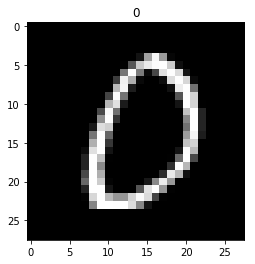

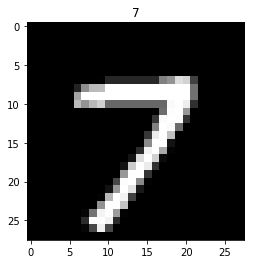

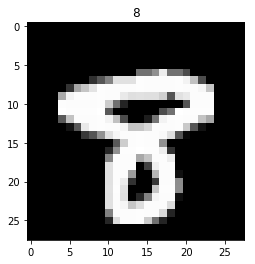

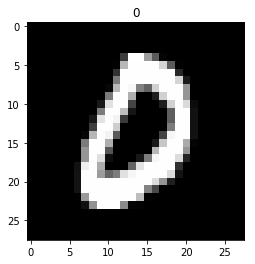

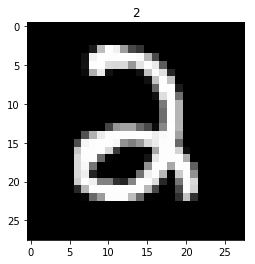

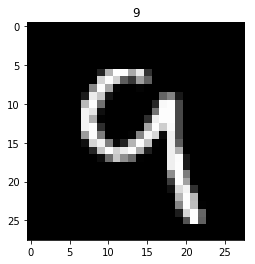

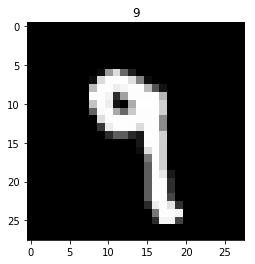

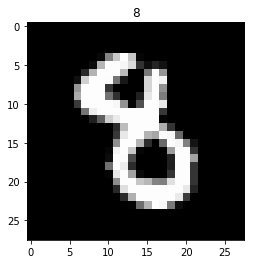

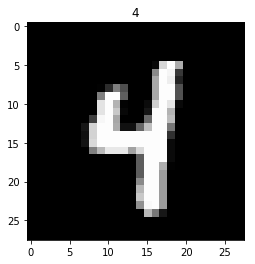

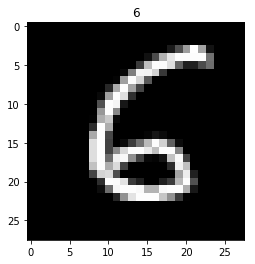

In [247]:
#random sample plotting
N_samples=np.shape(YY)[0]

picks=np.random.choice(N_samples, 10)
print(picks)
for i in picks:
    plt.figure(figsize=(4,4))
    plt.imshow(img_norm_global[i],cmap='gray')
    plt.title(label_map[expr[i]])
    plt.show()

In [263]:
list1 = [3,2,4,1, 1]
list2 = ['three', 'two', 'four', 'one', 'one2']
list1, list2 = zip(*sorted(zip(list1, list2)))

In [264]:
list1

(1, 1, 2, 3, 4)

In [265]:
list2

('one', 'one2', 'two', 'three', 'four')

In [269]:
list1 = [3,2,4,1, 1]
list2 = [3, 0, 1, 5, 2]
list1, list2 = zip(*sorted(zip(list1, list2)))

In [270]:
list1

(1, 1, 2, 3, 4)

In [271]:
list2

(2, 5, 0, 3, 1)

In [273]:
from sklearn.neighbors import KNeighborsClassifier

In [276]:
#comparing the results with my own code uniform weight

X_train=XX[0:1000,:]
Y_train=YY[0:1000]

X_test=XX[1000:2000,:]
Y_test=YY[1000:2000]

error_rate = []
error_rate2 = []

accuracy_rate = []
accuracy_rate2 = []
# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_train)
    pred_ii = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_train))
    error_rate2.append(np.mean(pred_ii != Y_test))
    accuracy_rate.append(np.mean(pred_i == Y_train))
    accuracy_rate2.append(np.mean(pred_ii == Y_test))

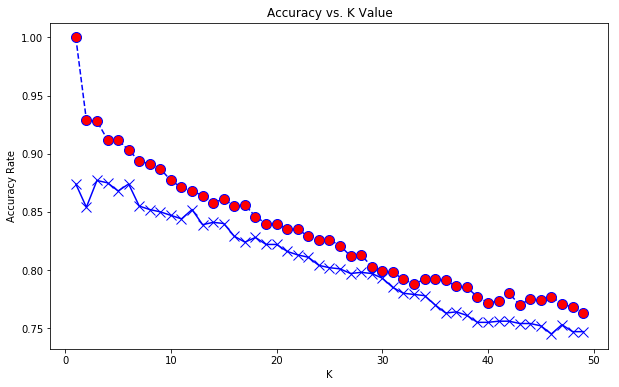

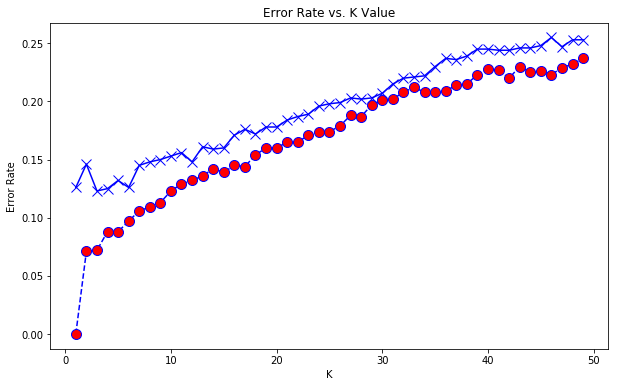

In [277]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,50),accuracy_rate2,color='blue', marker='x',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,50),error_rate2,color='blue', marker='x',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [278]:
#comparing the results with my own code distance weigh

X_train=XX[0:1000,:]
Y_train=YY[0:1000]

X_test=XX[1000:2000,:]
Y_test=YY[1000:2000]

error_rate = []
error_rate2 = []

accuracy_rate = []
accuracy_rate2 = []
# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_train)
    pred_ii = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_train))
    error_rate2.append(np.mean(pred_ii != Y_test))
    accuracy_rate.append(np.mean(pred_i == Y_train))
    accuracy_rate2.append(np.mean(pred_ii == Y_test))

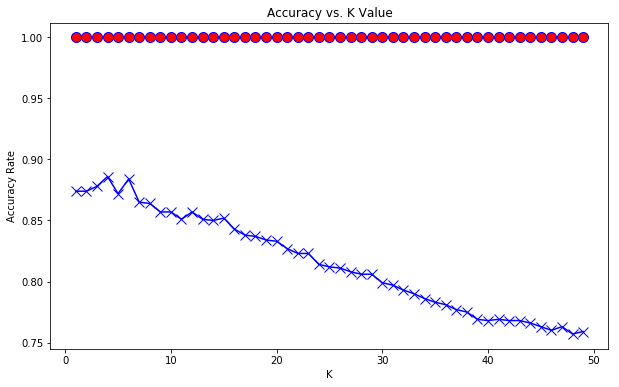

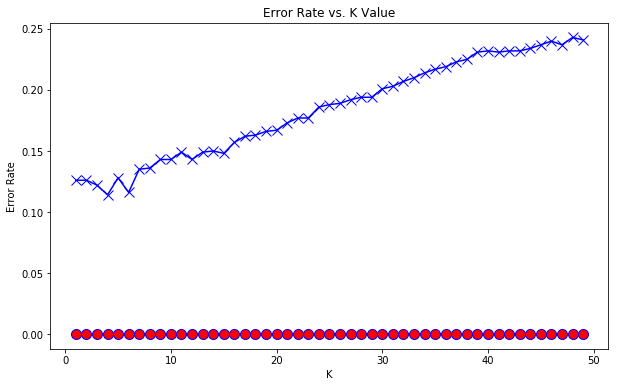

In [279]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,50),accuracy_rate2,color='blue', marker='x',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,50),error_rate2,color='blue', marker='x',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()